In [45]:
from common_functions import *
import cv2
%matplotlib inline
%load_ext autoreload
%autoreload 2
from scipy.ndimage import median_filter
from skimage.filters import gaussian
from skimage.exposure import equalize_hist
from skimage.exposure import adjust_gamma,adjust_log
from scipy.ndimage import binary_erosion,binary_closing,binary_opening,binary_dilation
from sympy import factorint
from skimage.measure import find_contours
from skimage.filters import threshold_minimum
from imutils.perspective import four_point_transform




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


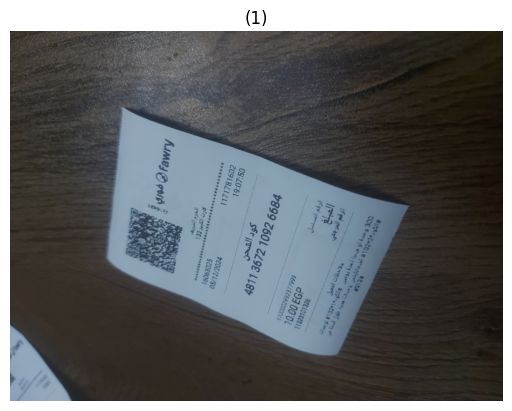

In [ ]:
#image = io.imread(../imgs/1.jpg')
show_images([image])

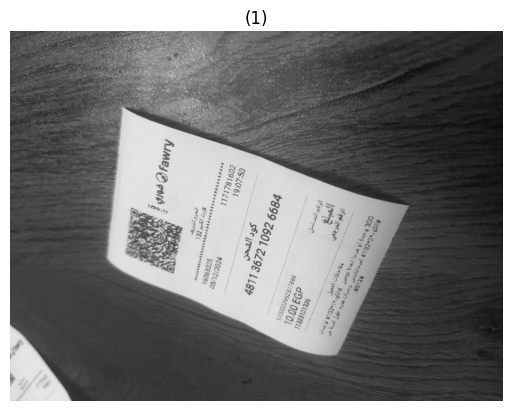

In [47]:
imageGrey = rgb2gray(image)
show_images([imageGrey])

In [48]:
equalised = equalize_hist(imageGrey)

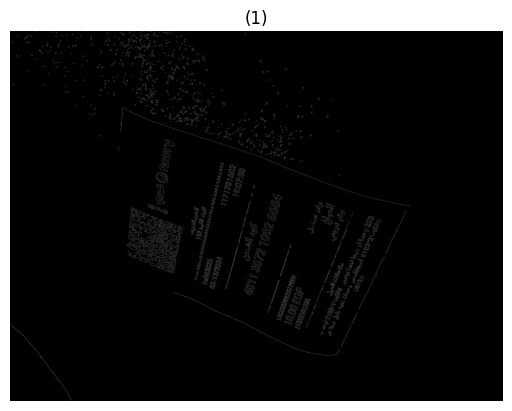

In [49]:
edgeImage = canny(imageGrey, sigma=2)
show_images([edgeImage])

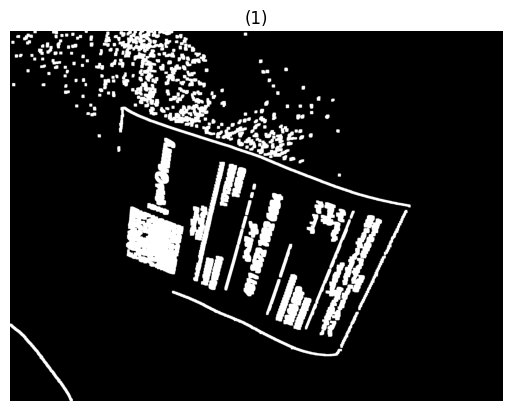

In [50]:
dilated = binary_dilation(edgeImage,np.ones((5,5)),iterations=5)
show_images([dilated])

In [51]:
# Function to calculate the area of a contour
def contour_area(contour):
    x_min = np.min(contour[:, 1])  # Min x-coordinate
    x_max = np.max(contour[:, 1])  # Max x-coordinate
    y_min = np.min(contour[:, 0])  # Min y-coordinate
    y_max = np.max(contour[:, 0])  # Max y-coordinate
    return (x_max - x_min) * (y_max - y_min)


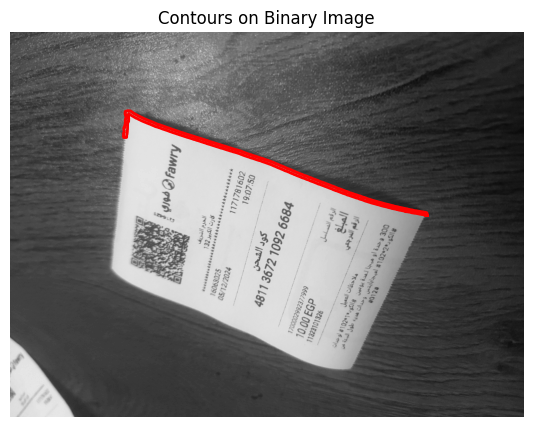

In [52]:
contours = find_contours(dilated,0.8)
contours = sorted(contours, key=len, reverse=True)
import matplotlib.pyplot as plt


# Plot the binary image with contours
plt.figure(figsize=(10, 5))
plt.imshow(imageGrey, cmap='gray')  # Display the binary image
plt.title("Contours on Binary Image")
plt.axis("off")


# Plot each contour
maxC = max(contours, key=len)
c = maxC

plt.plot(c[:, 1], c[:, 0], linewidth=2, color='red')  # Contours are in (y, x) format